# Exploración de base de diabetes

Exploración de base de datos para estudio de diabetes usando TDA.

## Análisis  Exploratorio de Datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../db/diabetes.csv")
diabetes = df.copy()
diabetes = diabetes.iloc[0:101]

In [3]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               101 non-null    int64  
 1   Glucose                   101 non-null    int64  
 2   BloodPressure             101 non-null    int64  
 3   SkinThickness             101 non-null    int64  
 4   Insulin                   101 non-null    int64  
 5   BMI                       101 non-null    float64
 6   DiabetesPedigreeFunction  101 non-null    float64
 7   Age                       101 non-null    int64  
 8   Outcome                   101 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.574257,118.386139,68.108911,19.702970,73.613861,31.075248,0.476386,34.405941,0.376238
std,3.589837,33.841977,21.902466,16.345363,126.030153,9.596660,0.376835,11.157220,0.486857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,25.400000,0.248000,26.000000,0.000000
50%,4.000000,113.000000,72.000000,21.000000,0.000000,32.000000,0.344000,31.000000,0.000000
75%,7.000000,139.000000,80.000000,32.000000,110.000000,37.600000,0.586000,42.000000,1.000000
max,15.000000,197.000000,110.000000,60.000000,846.000000,49.700000,2.288000,60.000000,1.000000


Notemos que existen datos con IMC nulo, lo que no es posible. Decidimos eliminarlos pues representan el 1.4% de los datos y no son singnificativos para ningún sector se la muestra.

In [6]:
diabetes = diabetes[diabetes["BMI"] > 0]

## Validación cruzada

Primero, normalizamos los datos.

In [7]:
import numpy as np
 
def norma(columna: str) -> float:
    # Definimos la columna como un arreglo de numpy
    vector = np.array(columna)
    # calculamos la norma como l2>
    try:
        norma = np.sqrt(np.dot(vector, vector))
        return float(norma)
    except Exception as e:
        print(e)

In [8]:
columnas = diabetes.columns.tolist()
normas = []
for columna in columnas:
    normas.append(float(norma(diabetes[columna])))

for norma, columna in zip(normas, columnas):
    diabetes[columna] = diabetes[columna] / norma

In [9]:
import matplotlib.pyplot as plt

def graficar_puntos(col1: str, col2: str):
    plt.figure(figsize=(6,4))
    plt.scatter(diabetes[col1], diabetes[col2])
    plt.title(f"{col1} según {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

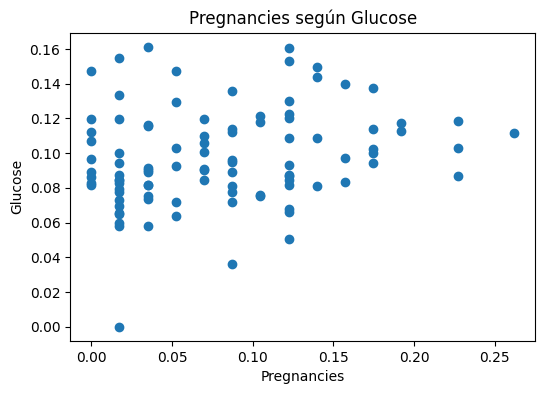

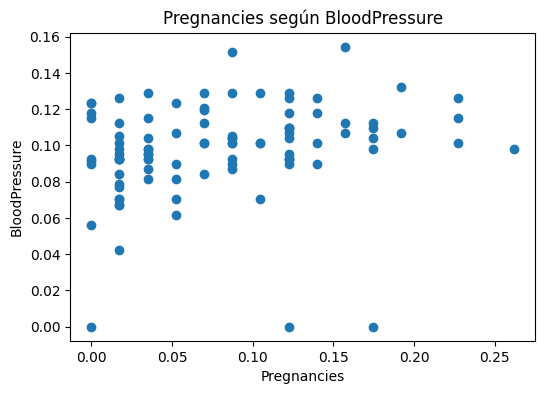

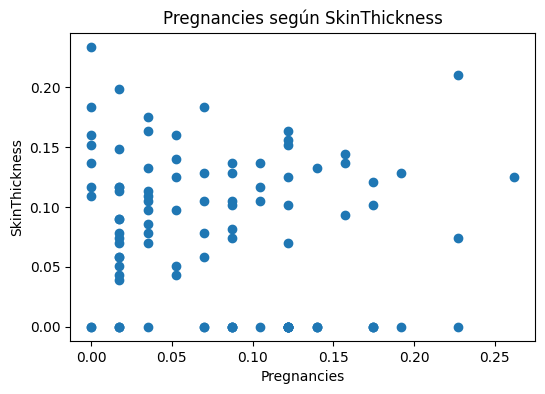

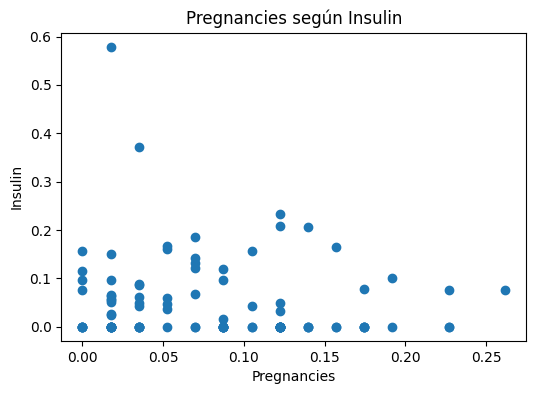

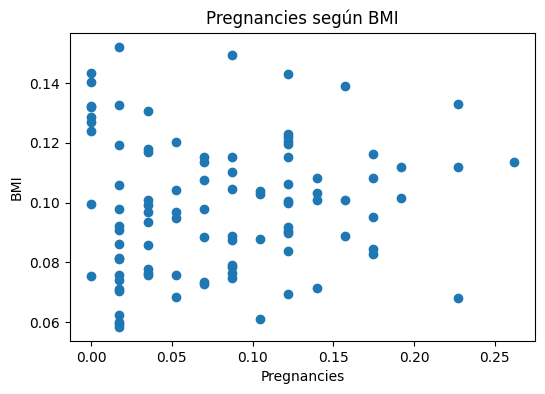

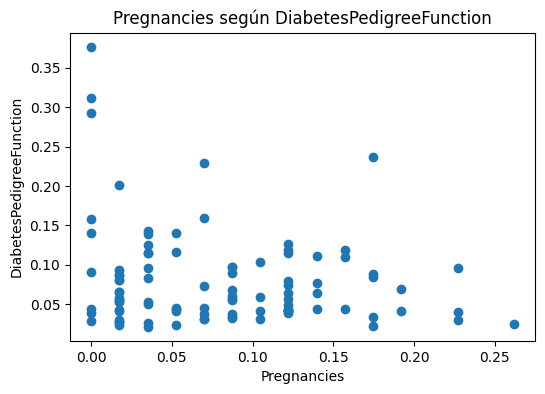

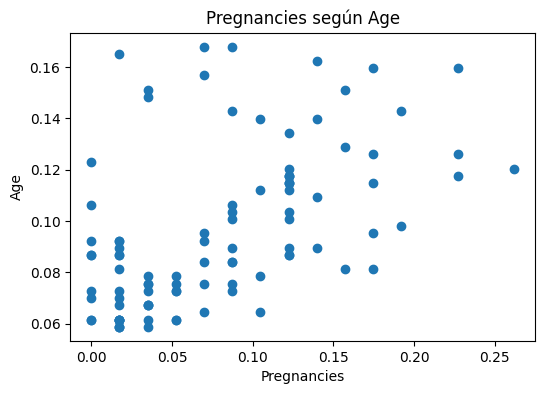

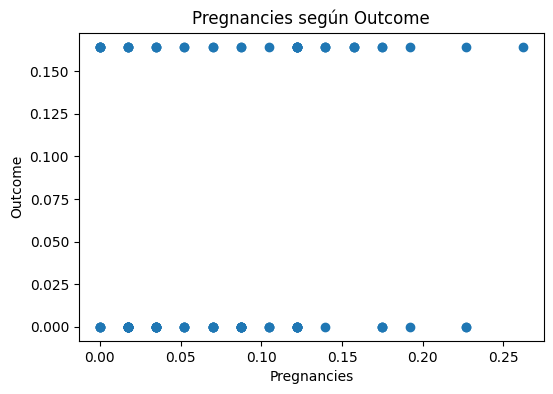

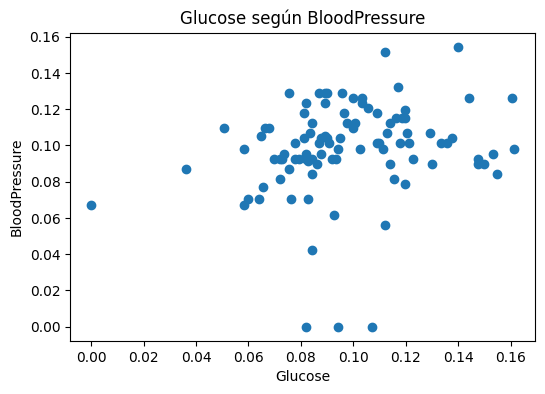

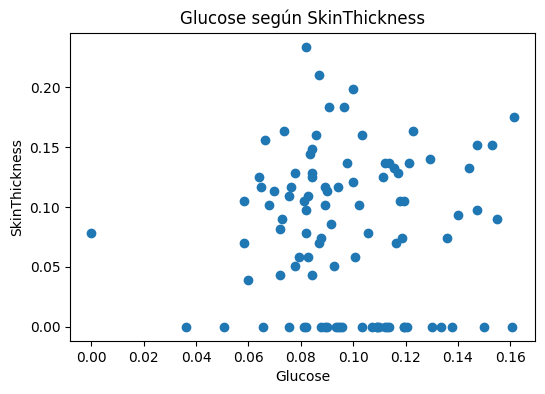

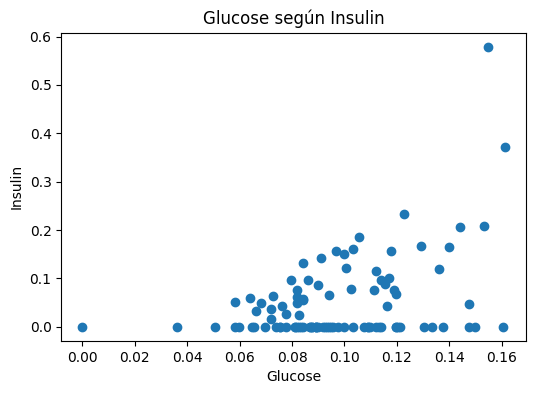

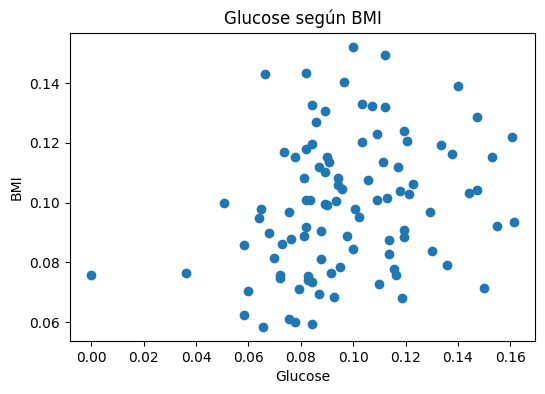

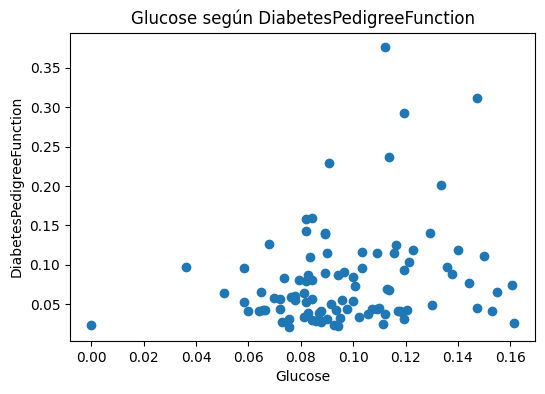

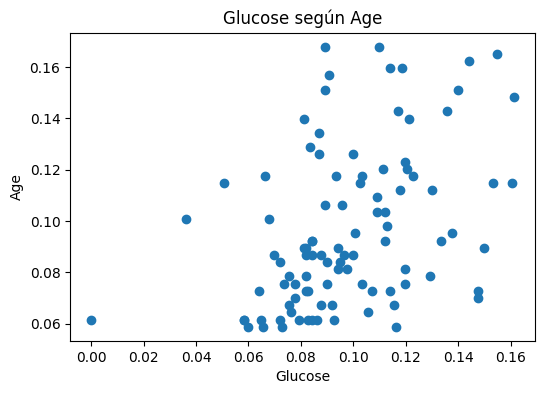

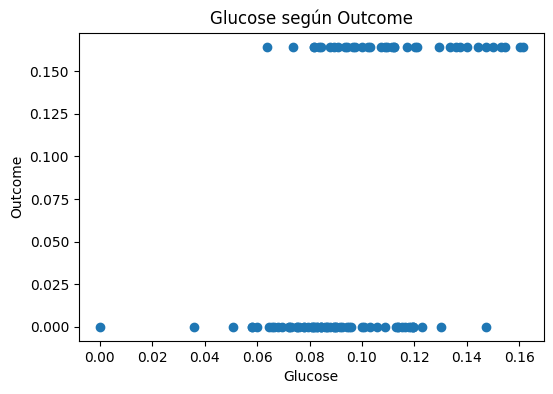

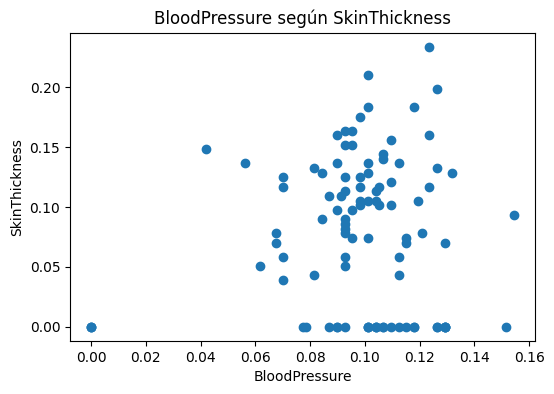

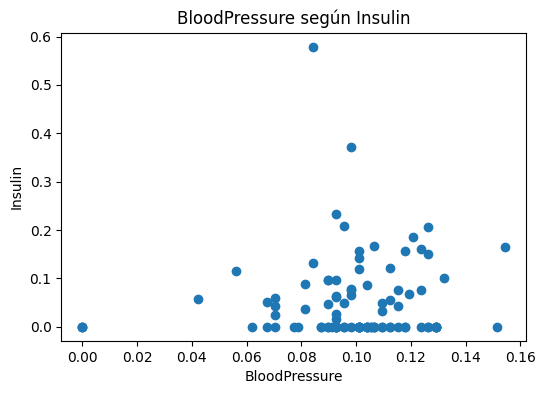

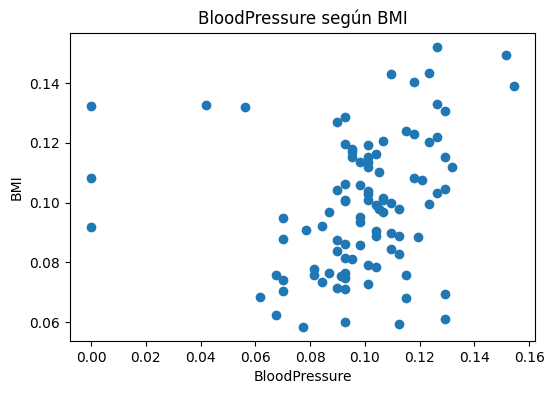

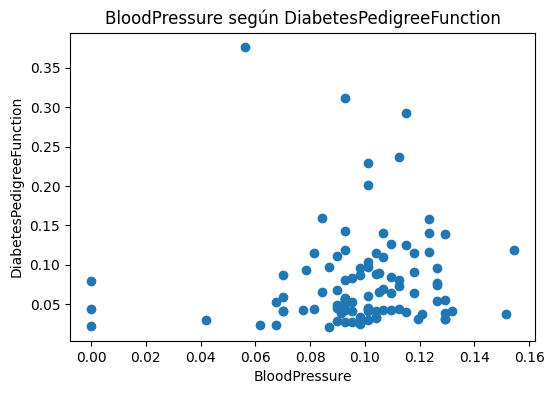

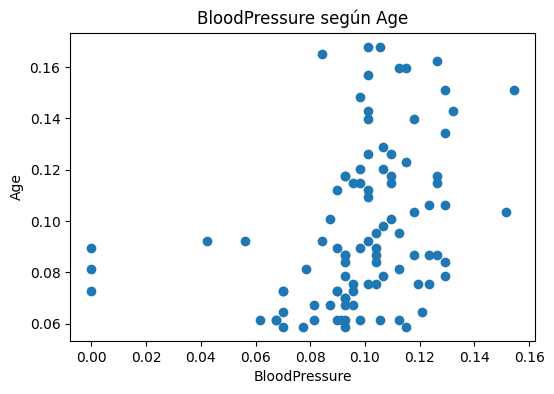

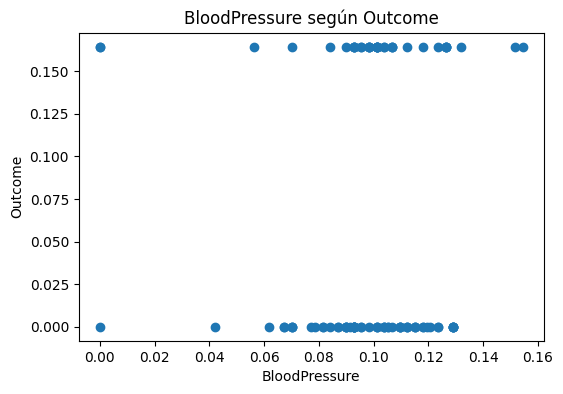

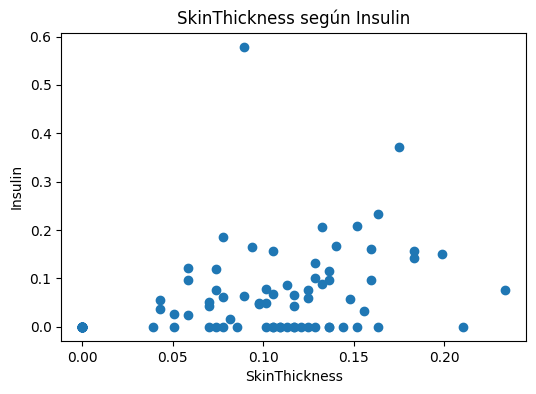

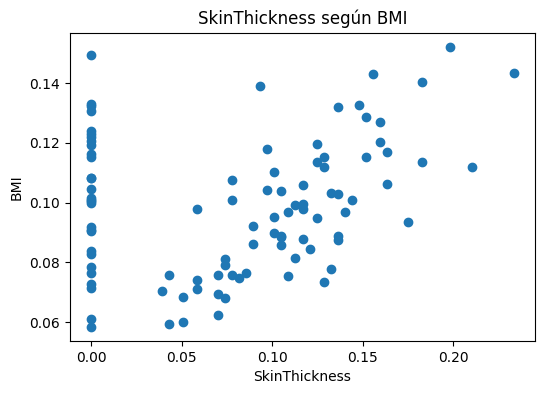

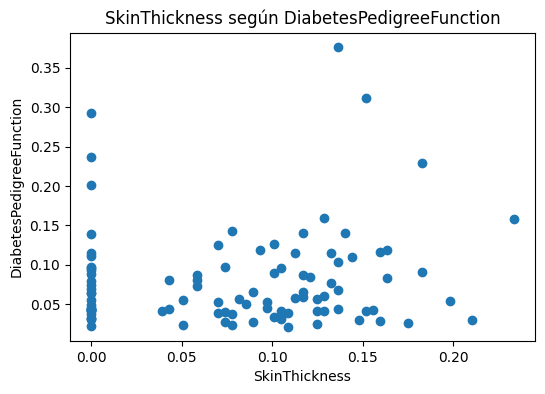

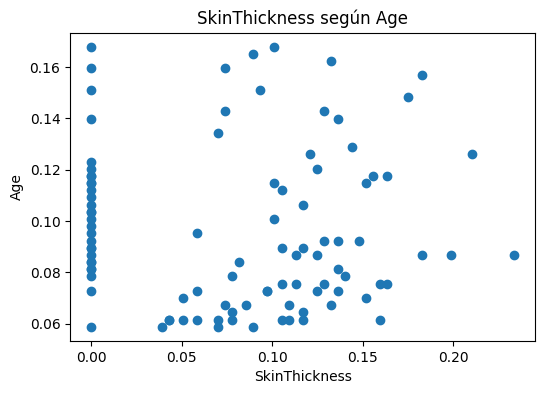

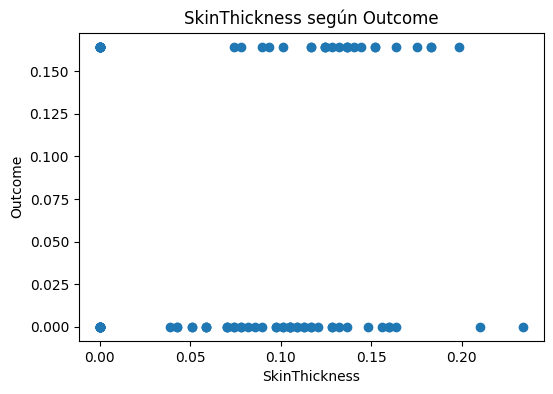

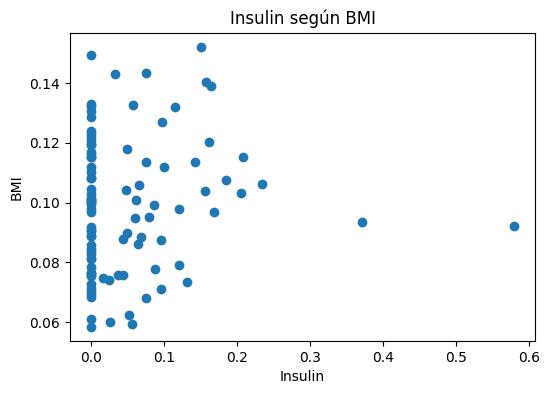

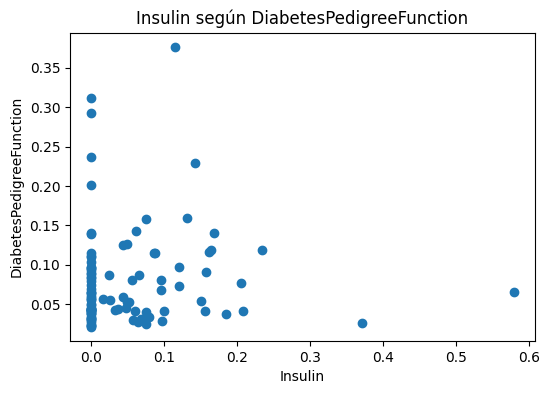

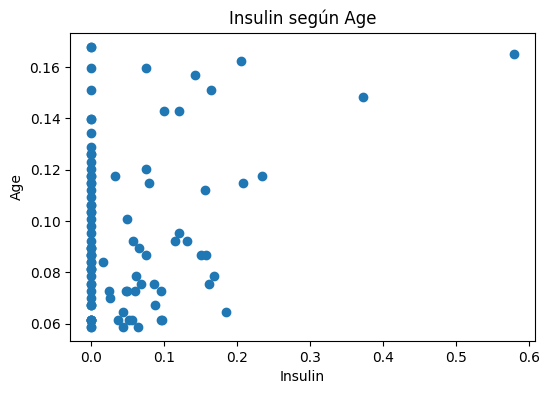

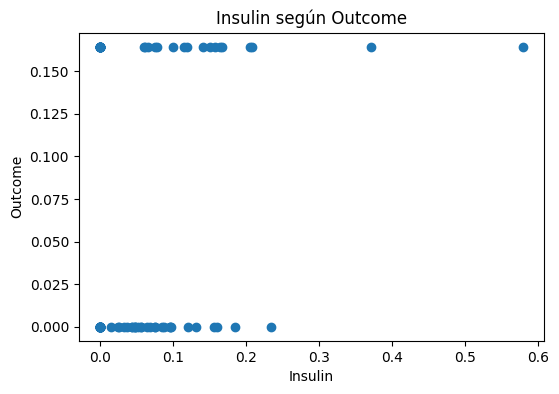

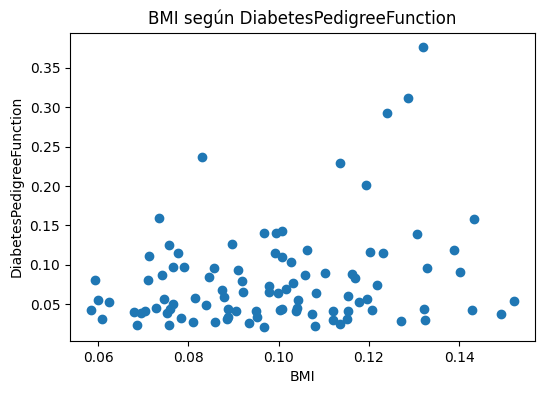

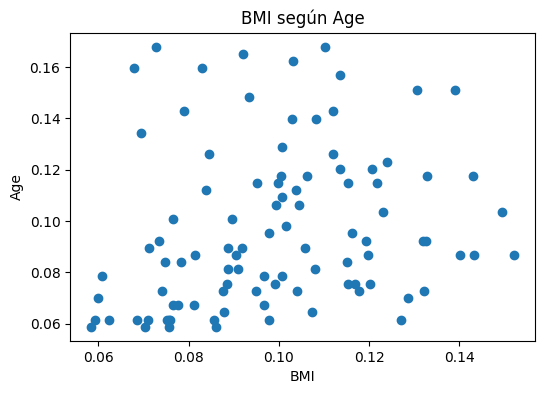

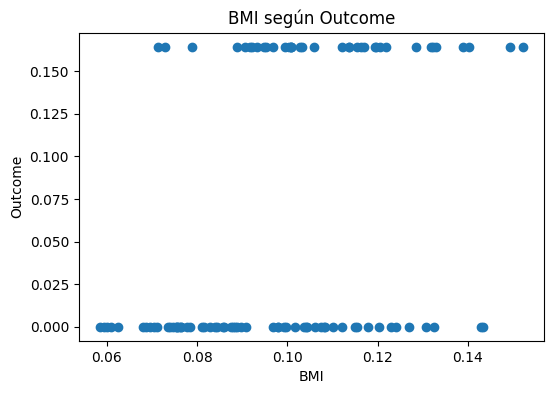

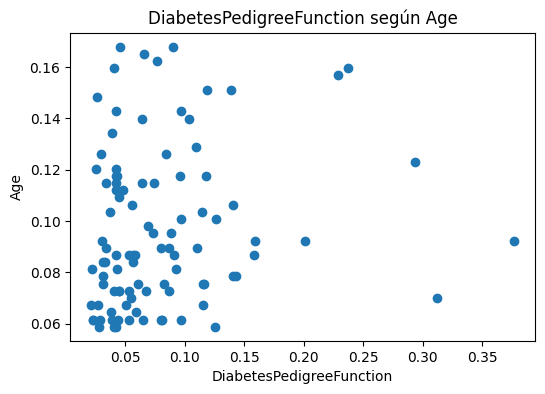

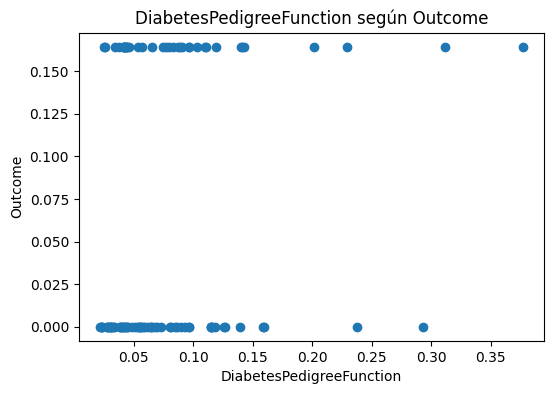

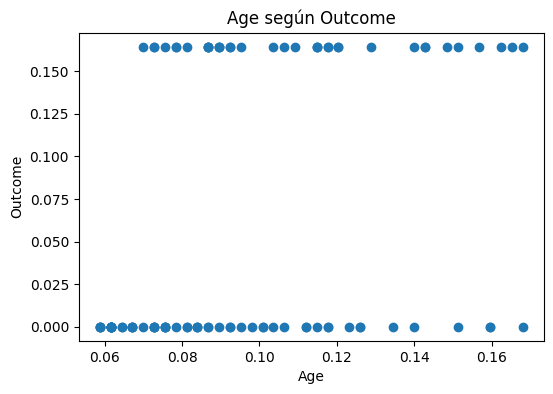

In [10]:
from itertools import combinations

# Elegir tamaño de subconjuntos para validación cruzada
k = 2
parejas = combinations(columnas, k)
for pareja in parejas:
    graficar_puntos(pareja[0], pareja[1])

## Medir qué tan buena es una combinación

In [11]:
correlaciones = diabetes.corr()
correlaciones

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.224132,0.213557,-0.157924,-0.116130,0.062590,-0.202663,0.515104,0.176938
Glucose,0.224132,1.000000,0.209968,-0.005727,0.422594,0.263325,0.225372,0.413433,0.442846
BloodPressure,0.213557,0.209968,1.000000,0.073244,0.070322,0.207084,0.070463,0.351477,0.044526
SkinThickness,-0.157924,-0.005727,0.073244,1.000000,0.426562,0.253691,0.098837,-0.028040,0.084345
Insulin,-0.116130,0.422594,0.070322,0.426562,1.000000,0.108728,0.045073,0.267736,0.214986
BMI,0.062590,0.263325,0.207084,0.253691,0.108728,1.000000,0.247105,0.227762,0.371196
DiabetesPedigreeFunction,-0.202663,0.225372,0.070463,0.098837,0.045073,0.247105,1.000000,0.154649,0.177222
Age,0.515104,0.413433,0.351477,-0.028040,0.267736,0.227762,0.154649,1.000000,0.338652
Outcome,0.176938,0.442846,0.044526,0.084345,0.214986,0.371196,0.177222,0.338652,1.000000


## Empezar a programar el Complejo de Vietoris-Rips

In [41]:
# Calcular la distancia mínima entre dos puntos
def distancia(arr1, arr2) -> float:
    diff = arr1 - arr2
    distancia = np.sqrt(np.dot(diff, diff))
    return distancia

dic_distancias = {}
parejas = combinations(columnas, 2)
for pareja in parejas:
    distancias = []
    df_temp = diabetes[list(pareja)]
    try:
        indices = combinations(range(len(df_temp)), 2)
        for indice in indices:
            punto1 = df_temp.iloc[indice[0]].values
            punto2 = df_temp.iloc[indice[1]].values
            dis = distancia(punto1, punto2)
            distancias.append(dis)
        dic_distancias[pareja] = min(distancias)    
    except:
        pass
  


In [42]:
dic_distancias

{('Pregnancies', 'Glucose'): 0.0,
 ('Pregnancies', 'BloodPressure'): 0.0,
 ('Pregnancies', 'SkinThickness'): 0.0,
 ('Pregnancies', 'Insulin'): 0.0,
 ('Pregnancies', 'BMI'): 0.0003060776369358531,
 ('Pregnancies', 'DiabetesPedigreeFunction'): 0.0,
 ('Pregnancies', 'Age'): 0.0,
 ('Pregnancies', 'Outcome'): 0.0,
 ('Glucose', 'BloodPressure'): 0.000818987634801413,
 ('Glucose', 'SkinThickness'): 0.0,
 ('Glucose', 'Insulin'): 0.0,
 ('Glucose', 'BMI'): 0.0008743135969375388,
 ('Glucose', 'DiabetesPedigreeFunction'): 0.0008353810583297443,
 ('Glucose', 'Age'): 0.0,
 ('Glucose', 'Outcome'): 0.0,
 ('BloodPressure', 'SkinThickness'): 0.0,
 ('BloodPressure', 'Insulin'): 0.0,
 ('BloodPressure', 'BMI'): 0.000306077636935867,
 ('BloodPressure', 'DiabetesPedigreeFunction'): 0.0,
 ('BloodPressure', 'Age'): 0.0,
 ('BloodPressure', 'Outcome'): 0.0,
 ('SkinThickness', 'Insulin'): 0.0,
 ('SkinThickness', 'BMI'): 0.0003060776369358531,
 ('SkinThickness', 'DiabetesPedigreeFunction'): 0.0,
 ('SkinThickness',